In [16]:
# Install Tweepy if needed with
# !sudo pip install tweepy==3.3.0

In [2]:
import tweepy
from tweepy import OAuthHandler

import pandas as pd
import datetime
from textwrap import wrap

%matplotlib inline
plt.style.use('ggplot')
plt.rc('font', size=15) 
plt.rc('axes', titlesize=15)
plt.rc('axes', labelsize=15)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=15)
plt.rc('figure', titlesize=15)

In [ ]:
consumer_key = '** Your details here **'
consumer_secret = '** Your details here **'
access_token = '** Your details here **'
access_secret = '** Your details here **'
 
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
print("Successfully registered account:" + api.me().screen_name)

In [6]:
# Tweepy library for the Twitter Streaming API

#from tweepy import Stream
#from tweepy.streaming import StreamListener

In [3]:
def process_or_store(tweet):
    with open('daps.json', 'a') as f:
        f.write(json.dumps(tweet))

In [46]:
# Get last 10 tweets on home account feed 

for status in tweepy.Cursor(api.home_timeline).items(5):
    process_or_store(tweet._json)

In [ ]:
#https://www.karambelkar.info/2015/01/how-to-use-twitters-search-rest-api-most-effectively./

import sys
import os

searchQuery = '#dogsatpollingstations'
maxTweets = 1000000
tweetsPerQry = 100
fName = 'daps9th.txt' # We'll store the tweets in a text file.

# If results from a specific ID onwards are reqd, set since_id to that ID.
# else default to no lower limit, go as far back as API allows
sinceId = 872966455666630660
max_id = -1

tweetCount = 0
print("Downloading max {0} tweets".format(maxTweets))
with open(fName, 'w') as f:
    while tweetCount < maxTweets:
        try:
            if (max_id <= 0):
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since='2017-06-08', until='2017-06-10')
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since='2017-06-08', until='2017-06-10',
                                            since_id=sinceId)
            else:
                if (not sinceId):
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since='2017-06-08', until='2017-06-10',
                                            max_id=str(max_id - 1))
                else:
                    new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since='2017-06-08', until='2017-06-10',
                                            max_id=str(max_id - 1),
                                            since_id=sinceId)
            if not new_tweets:
                print("No more tweets found")
                break
                
            for tweet in new_tweets:
                f.write(str(tweet.id) + ', ' + str(tweet.created_at) + '\n')
            tweetCount += len(new_tweets)
            print("Downloaded {0} tweets".format(tweetCount))
            max_id = new_tweets[-1].id
        except tweepy.TweepError as e:
            print("error : " + str(e))
            break

print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, fName))

In [5]:
daps_df = pd.read_csv('HashtagDogsAtPollingStations.csv')
daps_df.head(3)

,Column 1,Column 2
0,873328794043506688,2017-06-09 23:59:44
1,873328533329907712,2017-06-09 23:58:42
2,873327333800681472,2017-06-09 23:53:56


In [6]:
daps_df.rename(columns={'Column 1': 'ID', 'Column 2': 'Timestamp'}, inplace=True)
daps_df.head(10)

,ID,Timestamp
0,873328794043506688,2017-06-09 23:59:44
1,873328533329907712,2017-06-09 23:58:42
2,873327333800681472,2017-06-09 23:53:56
3,873327303618478080,2017-06-09 23:53:49
4,873327240892821504,2017-06-09 23:53:34
5,873327140120535043,2017-06-09 23:53:10
6,873326449431916548,2017-06-09 23:50:25
7,873326443186487297,2017-06-09 23:50:24
8,873326427751534592,2017-06-09 23:50:20
9,873326236558172160,2017-06-09 23:49:35


In [9]:
daps_df['Timestamp'] = pd.to_datetime(daps_df['Timestamp'])

In [10]:
daps_df.head(10)

,ID,Timestamp
0,873328794043506688,2017-06-09 23:59:44
1,873328533329907712,2017-06-09 23:58:42
2,873327333800681472,2017-06-09 23:53:56
3,873327303618478080,2017-06-09 23:53:49
4,873327240892821504,2017-06-09 23:53:34
5,873327140120535043,2017-06-09 23:53:10
6,873326449431916548,2017-06-09 23:50:25
7,873326443186487297,2017-06-09 23:50:24
8,873326427751534592,2017-06-09 23:50:20
9,873326236558172160,2017-06-09 23:49:35


In [11]:
daps_df.dtypes

ID                    int64
Timestamp    datetime64[ns]
dtype: object

In [12]:
daps_pd = daps_df['Timestamp'].groupby([daps_df["Timestamp"].dt.year, daps_df["Timestamp"].dt.month, daps_df["Timestamp"].dt.day])
tuple = (2017,6,8)
daps_pd = pd.DataFrame(daps_pd.get_group(tuple))
daps_pd.describe()

,Timestamp
count,96519
unique,47508
top,2017-06-08 20:15:08
freq,34
first,2017-06-08 00:01:01
last,2017-06-08 23:59:56


In [13]:
# The TimeGrouper will need the timestamp as the index, so set this first
daps_pd.set_index('Timestamp', drop=False, inplace=True)

# Then use a groupby and pass in a TimeGrouper with the frequency you want -
daps_pd_plot = daps_pd.groupby(pd.TimeGrouper(freq='15Min')).count()
daps_pd_plot

,Timestamp
Timestamp,
2017-06-08 00:00:00,21
2017-06-08 00:15:00,15
2017-06-08 00:30:00,21
2017-06-08 00:45:00,12
2017-06-08 01:00:00,13
2017-06-08 01:15:00,14
2017-06-08 01:30:00,11
2017-06-08 01:45:00,17
2017-06-08 02:00:00,14


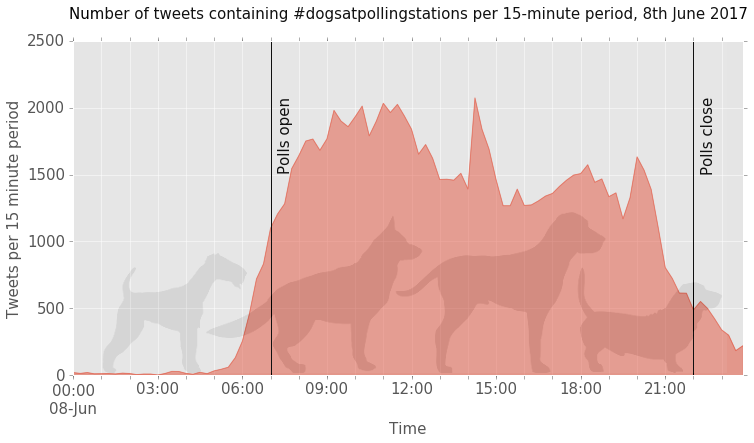

In [35]:
xtick_array = ['2017-06-08 00:00:00', '2017-06-08 01:00:00', '2017-06-08 02:00:00', '2017-06-08 03:00:00', '2017-06-08 04:00:00', '2017-06-08 05:00:00', '2017-06-08 06:00:00', 
'2017-06-08 07:00:00', '2017-06-08 08:00:00', '2017-06-08 09:00:00', '2017-06-08 10:00:00', '2017-06-08 11:00:00', '2017-06-08 12:00:00', '2017-06-08 13:00:00', 
'2017-06-08 14:00:00', '2017-06-08 15:00:00', '2017-06-08 16:00:00', '2017-06-08 17:00:00', '2017-06-08 18:00:00', '2017-06-08 19:00:00', '2017-06-08 20:00:00', 
'2017-06-08 21:00:00', '2017-06-08 22:00:00', '2017-06-08 23:00:00']

daps_pd_plot.plot(kind='area', alpha=0.5, figsize=(12,6), legend=False, xticks=xtick_array)

plt.title("Number of tweets containing #dogsatpollingstations per 15-minute period, 8th June 2017\n")
plt.xlabel("Time")
plt.ylabel("Tweets per 15 minute period")

plt.axvline('2017-06-08 07:00:00', color='black')
plt.axvline('2017-06-08 22:00:00', color='black')
plt.text('2017-06-08 07:15:00', 2000,'Polls open', rotation=90)
plt.text('2017-06-08 22:15:00', 2000,'Polls close', rotation=90)

plt.figimage(plt.imread('woof.png'), 100, 70, alpha=.07, zorder=5)
plt.savefig('vis_output/DogsAtPollingStations.png')